In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [31]:
df=sns.load_dataset('iris')

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The split in species is

 versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: species, dtype: float64


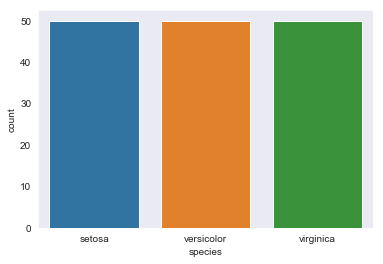

In [33]:
sns.countplot(df['species'])
print('The split in species is' '\n' '\n', df['species'].value_counts(normalize=True))

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


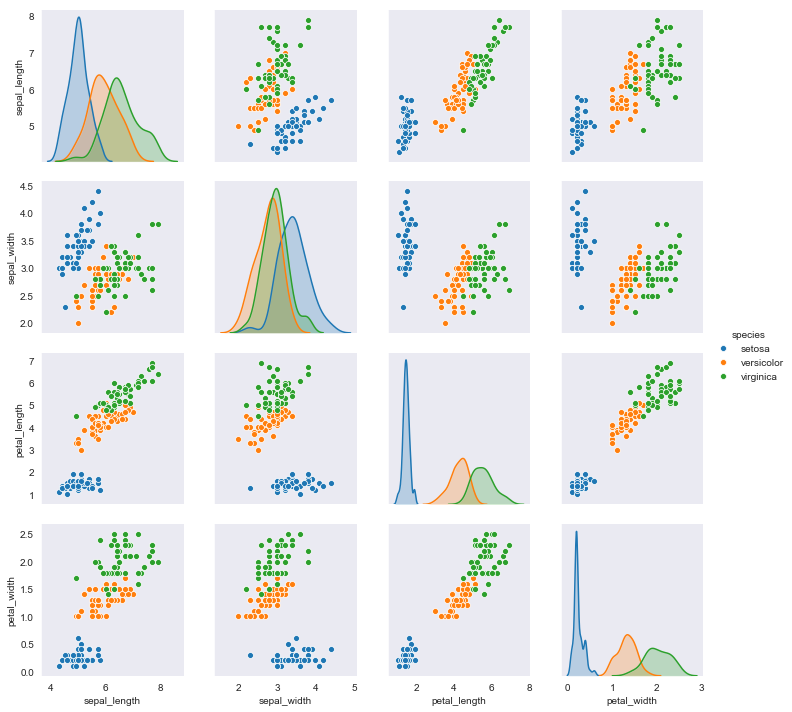

In [34]:
sns.pairplot(df,hue='species')

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


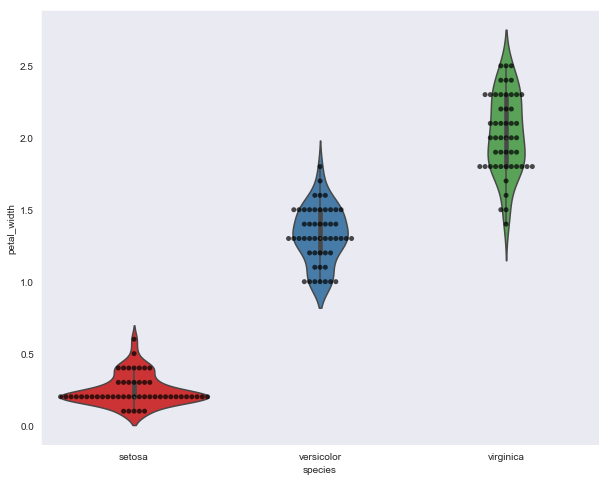

In [60]:
plt.figure(figsize=(10,8))
sns.set_style('dark')
sns.violinplot(x='species',y='petal_width',data=df,palette='Set1')
sns.swarmplot(x='species',y='petal_width',data=df,color='k',alpha=0.7)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [62]:
X=df.drop('species',axis=1)
y=df['species']

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [64]:
preproc=make_pipeline(StandardScaler(),Normalizer())

In [65]:
preproc.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('normalizer', Normalizer(copy=True, norm='l2'))])

In [66]:
preproc.transform(X_train)
preproc.transform(X_test)

array([[-0.28278912, -0.94302785, -0.01833471, -0.17433483],
       [ 0.19215675, -0.67197975,  0.69488871,  0.16925923],
       [-0.35375489,  0.63234133, -0.4676533 , -0.50626309],
       [-0.19899877,  0.44721472, -0.63220481, -0.600596  ],
       [ 0.51188843,  0.14250987,  0.54805066,  0.64598889],
       [ 0.827656  , -0.32203092,  0.44510363,  0.11473619],
       [-0.37549894, -0.87108932,  0.31649247, -0.00603884],
       [ 0.04611451,  0.30695188,  0.57649681,  0.75584749],
       [ 0.50226085, -0.08217915,  0.53285247,  0.6760539 ],
       [ 0.45879938,  0.06674097,  0.69638052,  0.54781652],
       [-0.68033413, -0.13397291, -0.5119523 , -0.50705184],
       [-0.58342506, -0.0575326 , -0.60458752, -0.53923939],
       [-0.47153652,  0.24354128, -0.60218348, -0.59641932],
       [-0.67064046, -0.04494627, -0.53261926, -0.51433251],
       [ 0.52123234, -0.08528324,  0.66738902,  0.52501   ],
       [-0.04005585, -0.3105381 ,  0.41659444,  0.85346979],
       [ 0.70850653,  0.

In [67]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [68]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
pred=svm.predict(X_test)

In [70]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print('Confusion Matrix:' '\n',metrics.classification_report(y_test,pred))

Confusion Matrix:
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      0.93      0.96        14
  virginica       0.92      1.00      0.96        12

avg / total       0.98      0.97      0.97        38



In [72]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')

In [73]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
pred=svm.predict(X_test)

In [75]:
print('Confusion Matrix:' '\n',metrics.classification_report(y_test,pred))

Confusion Matrix:
              precision    recall  f1-score   support

     setosa       0.04      0.08      0.06        12
 versicolor       0.00      0.00      0.00        14
  virginica       0.00      0.00      0.00        12

avg / total       0.01      0.03      0.02        38



C:\Users\Gwenn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
from sklearn.svm import SVC
svm=SVC(kernel='poly',degree=8)

In [77]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
pred=svm.predict(X_test)

In [79]:
print('Confusion Matrix:' '\n',metrics.classification_report(y_test,pred))

Confusion Matrix:
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.87      0.93      0.90        14
  virginica       0.91      0.83      0.87        12

avg / total       0.92      0.92      0.92        38



In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
score=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=5,n_jobs=1)

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 
                   'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'degree':[1, 2, 3, 4, 5, 6, 7, 8, 9] },
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 
                    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 
                   'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [83]:
grid=GridSearchCV(svm,param_grid=param_grid,n_jobs=1,cv=5)

In [84]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:

grid.best_params_


{'C': 1, 'degree': 1, 'gamma': 0.6, 'kernel': 'poly'}

In [96]:
svm=SVC(C= 1,kernel='poly',degree=1)

In [97]:
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
pred=svm.predict(X_test)

In [99]:
print('Confusion Matrix:' '\n',metrics.classification_report(y_test,pred))

Confusion Matrix:
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      0.93      0.96        14
  virginica       0.92      1.00      0.96        12

avg / total       0.98      0.97      0.97        38



In [100]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [101]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
pred=logreg.predict(X_test)

In [103]:
print('Confusion Matrix:' '\n',metrics.classification_report(y_test,pred))

Confusion Matrix:
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      0.86      0.92        14
  virginica       0.86      1.00      0.92        12

avg / total       0.95      0.95      0.95        38

